# GPT-4 Technical Report (OpenAI, 2023)

# https://cdn.openai.com/papers/gpt-4.pdf

## Abstract
GPT-4 is a **large-scale multimodal Transformer model** that accepts **text and image inputs** and produces text outputs. It demonstrates **human-level performance** on a wide range of professional and academic benchmarks (e.g., top 10% on a simulated bar exam). Trained as an **autoregressive LM** with large-scale data and post-training alignment via **RLHF**, GPT-4 emphasizes both **scaling predictability** and **safety**. Infrastructure design enabled reliable extrapolation of performance from much smaller models.

---

## Problems
- **Limited generalization in prior LMs**: GPT-1/2/3 models were less reliable, prone to hallucinations, and struggled with nuanced reasoning.  
- **Unpredictable scaling**: Difficulty in forecasting performance for extremely large training runs.  
- **Safety challenges**: Larger models amplified risks of bias, harmful outputs, disinformation, and misuse.  
- **Transparency trade-offs**: Full details on model size, architecture, and datasets were withheld due to competitive and safety concerns.  

---

## Proposed Solutions
- **Predictable scaling**: Use **power-law fits** to extrapolate training loss and benchmark results from smaller-scale experiments.  
- **Post-training alignment**: Apply **Reinforcement Learning from Human Feedback (RLHF)** and **Rule-Based Reward Models (RBRMs)**.  
- **Safety pipeline**: Incorporate **expert adversarial red-teaming** and **automated safety evaluations**.  
- **Multimodality**: Extend beyond text-only models by incorporating **text–image reasoning capabilities**.  

---

## Purpose
To advance large-scale AI by achieving **human-level performance** across benchmarks, while addressing:
- Predictability of scaling,  
- Reliability of reasoning,  
- Alignment and safer deployment.

---

## Methodology
- **Model type**: Transformer autoregressive LM (parameter count undisclosed).  
- **Training data**: Mixture of **public internet data** and **licensed datasets**.  
- **Post-training**: Alignment with **RLHF** and safety-focused fine-tuning.  
- **Scaling experiments**: Predicted GPT-4 outcomes from models trained with up to **10,000× less compute**.  
- **Evaluation**: Professional exams, MMLU, ARC, DROP, HumanEval, GSM-8K, multilingual MMLU, and safety/factuality metrics.  

---

## Results
- **Professional / Academic Exams**:  
  - Bar Exam: top 10% (vs. GPT-3.5 bottom 10%).  
  - LSAT: ~88th percentile.  
  - SAT Reading: 93rd percentile.  
  - SAT Math: ~89th percentile.  
  - GRE Verbal: 99th percentile.  

- **NLP Benchmarks**:  
  - MMLU: 86.4% (vs. GPT-3.5 at 70%).  
  - HellaSwag: 95.3%.  
  - ARC: 96.3%.  
  - WinoGrande: 87.5%.  
  - HumanEval (coding): 67%.  
  - GSM-8K (math reasoning, CoT): 92%.  

- **Multilingual**: Outperformed GPT-3.5 English benchmark scores in **24/26 languages**, including low-resource languages.  

- **Safety**:  
  - Hallucinations reduced by **19%** vs. GPT-3.5.  
  - Toxic generations reduced from **6.48% → 0.73%**.  

- **Vision**: Preliminary results show **competence in text–image reasoning tasks**.  

---

## Conclusions
1. **Scaling is predictable**: Smaller-model trends successfully extrapolated to GPT-4.  
2. **Human-level performance**: GPT-4 surpasses average human test-takers on many professional benchmarks.  
3. **Safety improved but incomplete**: Hallucinations and reasoning errors persist, alongside adversarial vulnerabilities.  
4. **Broader impact**: GPT-4 expands AI’s scope across text and vision, but also **amplifies risks** (bias, misuse, over-reliance), requiring governance and oversight.  


# Mathematical and Statistical Content of the GPT-4 Technical Report (OpenAI, 2023)

## 1. Language Modeling Objective
GPT-4 is trained as a **causal language model**, predicting each token based on its history:

$$
P(x) = \prod_{i=1}^{n} P(x_i \mid x_{<i}; \Theta)
$$

- \(x_i\): token at position \(i\).  
- \(\Theta\): model parameters.  

**Role:** Core training objective—predict next-token probabilities.

---

## 2. Training Loss (Cross-Entropy / NLL)
The model minimizes **negative log-likelihood**:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \log P(x_i \mid x_{<i}; \Theta)
$$

- Lower loss = higher probability assigned to observed data.  
- This loss connects directly to **perplexity**.

---

## 3. Perplexity
Defined as the exponential of the average negative log-likelihood:

$$
\text{PPL} = \exp \left( -\frac{1}{N} \sum_{i=1}^{N} \log P(x_i) \right)
$$

- **Interpretation:** Measures model uncertainty.  
- Lower perplexity = better predictive power.  
- Used in GPT-4 scaling experiments to assess model quality.

---

## 4. Scaling Laws
Performance scales predictably with parameters, data, and compute:

$$
L(C) \approx aC^{-\alpha} + b
$$

- \(L(C)\): loss as a function of compute \(C\).  
- \(a, b, \alpha\): fitted constants.  

**Role:** Enabled extrapolation of GPT-4’s performance from smaller models trained with up to **10,000× less compute**.

---

## 5. Statistical Evaluation Metrics
GPT-4 was evaluated with multiple statistical measures:

- **Accuracy (%)**: Multiple-choice tasks (MMLU, ARC).  
- **F1 Score**: QA datasets (e.g., CoQA).  
- **Pass@k**: Coding tasks (HumanEval).  
- **Chain-of-Thought prompting effect**: Boosted GSM-8K accuracy (92% with CoT).  
- **Toxicity Rate**: % harmful outputs (dropped from 6.48% → 0.73%).  
- **Hallucination frequency**: Reduced by 19% vs GPT-3.5.  
- **Percentile ranking**: On exams (e.g., Bar, SAT, GRE) compared to humans.

---

## 6. Multilingual Evaluation
Performance across **26 languages**, measured as normalized accuracy.  

**Result:** GPT-4 outperformed GPT-3.5 in **24/26 languages**, including low-resource ones.

---

## 7. Safety and Robustness Analysis
- **Adversarial testing**: Expert red-teamers evaluated model failure rates.  
- **Calibration curves**: Checked whether predicted probabilities matched factual accuracy.  
- **Distributional statistics**: Bias and demographic output analysis.

---

## Summary in Plain Terms
- **Equations:** GPT-4 learns by predicting token sequences, minimizing cross-entropy, evaluated via perplexity.  
- **Scaling Laws:** Show smooth, predictable improvement with scale.  
- **Evaluation Metrics:** Accuracy, F1, pass@k, human percentile scores, and safety measures.  
- **Findings:** GPT-4 consistently outperforms GPT-3.5, scales predictably, reduces harmful outputs, and performs strongly across languages—but still struggles with reasoning depth and reliability.  


```
+---------------------------------------------------------------------------------+
|                                 GPT-4 Architecture                              |
+---------------------------------------------------------------------------------+

 Input Text
    |
    v
+---------------------+
|   Tokenization      |  --> Byte Pair Encoding (BPE) or similar tokenizer
+---------------------+
    |
    v
+---------------------+
|   Token Embeddings  |  --> Convert discrete tokens into dense vectors
+---------------------+
    |
    v
+---------------------+
| Positional Encoding |  --> Inject order information into embeddings
+---------------------+
    |
    v
+=================================================================================+
|                          Transformer Decoder Stack (N layers)                   |
|                                                                                 |
|   Each Layer:                                                                   |
|                                                                                 |
|   +----------------------+       +------------------------------------------+   |
|   | Multi-Head Attention | ----> | Residual Connection + Layer Normalization|   |
|   +----------------------+       +------------------------------------------+   |
|                 |                                                                
|                 v                                                                
|       +--------------------------------------+                                    
|       | Position-wise Feed-Forward Network   |   --> 2 linear layers + ReLU/GELU
|       +--------------------------------------+                                    
|                 |                                                                
|                 v                                                                
|       +------------------------------------------+                                
|       | Residual Connection + Layer Normalization|                                
|       +------------------------------------------+                                
|                                                                                 |
|   (Stacked N times: GPT-4 ~ dozens of layers, billions of parameters)            |
+=================================================================================+
    |
    v
+---------------------+
|   Final Layer Norm  |
+---------------------+
    |
    v
+---------------------+
|   Linear Projection |  --> Project hidden states into vocabulary dimension
+---------------------+
    |
    v
+---------------------+
|   Softmax Layer     |  --> Convert logits into probability distribution
+---------------------+
    |
    v
+---------------------+
|   Next-Token Output |  --> Sampled or argmax token
+---------------------+
    |
    v
+---------------------+
|   Iterative Decoding|  --> Feed predicted token back into model until <EOS>
+---------------------+

 Notes:
 - GPT-4 uses only the **decoder stack** (unlike encoder-decoder in NMT).
 - Training objective: next-token prediction (causal language modeling).
 - Scale: Hundreds of billions of parameters, trillions of training tokens.
 - Advanced alignment: Reinforcement Learning from Human Feedback (RLHF),
   constitutional AI, and safety fine-tuning post-pretraining.
```

# GPT-4 Technical Report (OpenAI, 2023) — Problems, Limitations of Prior Work, and Proposed Remedies

| **Key Problems / Research Gaps** | **How These Issues Limit Prior Work** | **Proposed Solutions in the GPT-4 Report** |
|----------------------------------|---------------------------------------|---------------------------------------------|
| **Unreliable reasoning and factuality in large LMs** | Hallucinations, brittle multi-step reasoning, and inconsistent answers reduce trust and hinder adoption in high-stakes domains. | Train a stronger base LM and apply **post-training alignment** (RLHF, rule-based reward models, safety tuning) plus **adversarial red-teaming** to improve factuality and robustness. |
| **Poor predictability of extreme-scale training outcomes** | Scaling to very large models is costly and risky without reliable forecasts of performance. | Use **scaling-law extrapolation** (power-law fits from smaller models) to predict GPT-4 loss and benchmark results, guiding compute and data decisions. |
| **Narrow modality coverage (text-only)** | Constrains applicability to tasks requiring **visual grounding** or text–image reasoning. | Introduce **multimodality**: accept **text + image inputs** while retaining text outputs, enabling broader task coverage. |
| **Safety, bias, and misuse risks increase with model capability** | Toxic or biased generations, and facilitation of harmful uses, limit safe deployment. | Establish a **safety pipeline**: expert red-teaming, policy-constrained reward models, content filtering, usage policies, and continuous monitoring/mitigation. |
| **Evaluation limited to narrow NLP benchmarks** | Prior evaluations underrepresented real-world difficulty and professional contexts. | Evaluate across **professional/academic exams** (Bar, LSAT, APs), broad NLP benchmarks (MMLU, ARC, HellaSwag, GSM-8K, HumanEval), and **multilingual tasks** to stress-test generality. |
| **Opaque reporting trade-offs** | Full transparency risks misuse and competitive harm; minimal reporting blocks scientific scrutiny. | Publish a **technical system card** with methods, evaluations, and safety analyses, while withholding architecture size and dataset details to balance openness with risk management. |
| **Limited multilingual performance in prior models** | Capabilities skewed toward English; weaker results in **low-resource languages**. | Train and evaluate GPT-4 for **multilingual generalization**, demonstrating accuracy gains in **24/26 languages** compared to GPT-3.5. |

---

## Summary
The GPT-4 report frames its contributions as direct remedies to longstanding gaps in prior LMs:  
- **Reliability:** Enhanced reasoning and factuality via alignment methods.  
- **Predictability:** Scaling laws used to forecast large-model outcomes.  
- **Coverage:** Expansion to multimodality and multilingual performance.  
- **Safety:** Dedicated pipelines to mitigate bias and misuse risks.  
- **Evaluation:** Broader stress-testing on professional, academic, and multilingual benchmarks.  
- **Transparency:** Balanced reporting through a structured system card approach.  

Together, these remedies represent GPT-4 as a **predictable, safer, multimodal system** that advances beyond GPT-3’s limitations.


# GPT-4 Technical Report (OpenAI, 2023) — Problems, Limitations, and Proposed Remedies

| **Key Problems / Research Gaps** | **How These Issues Limit Prior Work** | **Proposed Solutions in the GPT-4 Report** |
|----------------------------------|----------------------------------------|---------------------------------------------|
| **Fragility in reasoning and factual accuracy** | Prior LMs (GPT-2, GPT-3) hallucinate facts and fail at multi-step reasoning, restricting use in professional and academic settings. | Train a **stronger base LM** and apply **alignment post-training** (RLHF, reward models, adversarial red-teaming) to improve reliability and factuality. |
| **Uncertainty of scaling outcomes** | Training extremely large models is expensive without assurance that performance will follow predictable scaling trends. | Extend **scaling-law extrapolation** to forecast GPT-4’s performance from much smaller models, validating smooth loss scaling. |
| **Lack of multimodal capability** | Prior models only processed text, limiting ability to integrate visual or multimodal context. | Introduce **text–image multimodal inputs** (with text-only outputs), enabling GPT-4 to reason across modalities. |
| **Ethical risks: bias, toxicity, misuse** | Larger models amplify stereotypes, unsafe advice, and potential malicious applications. | Establish a **safety pipeline**: expert red-teaming, safety-tuned reward models, content filtering, usage policies, and ongoing monitoring. |
| **Narrow benchmark evaluations** | Earlier evaluations (GLUE, SuperGLUE, QA benchmarks) did not fully reflect real-world or professional task difficulty. | Evaluate GPT-4 on **professional/academic exams** (Bar, LSAT, APs), reasoning and coding tasks (MMLU, HumanEval, GSM-8K), and multilingual benchmarks. |
| **Opaque reporting of system details** | Too much secrecy reduces reproducibility; too much openness risks misuse and competitive harm. | Release a **system card** with technical, ethical, and evaluation details while withholding sensitive architecture/data specifics. |
| **Limited multilingual competence** | Prior models were heavily biased toward English and weaker in low-resource languages. | Train and assess GPT-4 for **multilingual generalization**, showing improved performance across diverse languages compared to GPT-3. |

---

## Summary
This structured mapping shows how the GPT-4 report directly addresses **limitations of prior GPT models**.  
- It strengthens **reasoning and factuality** through alignment.  
- Improves **predictability** of outcomes via scaling laws.  
- Expands to **multimodality** and **multilingual competence**.  
- Institutes stronger **safety pipelines**.  
- Evaluates on **more realistic and professional benchmarks**.  
- Balances **transparency and risk** with system card reporting.  

GPT-4 is thus framed as a **safer, more predictable, multimodal, and general-purpose AI system** compared to its predecessors.  


In [1]:
# ================================================================
#  Educational Lab: Mini GPT-4 (Simplified Transformer LM)
# ================================================================
# This is a didactic small-scale replication of GPT-4's *principles*,
# not the industrial-scale system (billions of parameters, multimodal).
# The lab shows the full workflow: training, evaluation, generation, plots.
# ================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1. TOY DATASET (Tiny corpus for demonstration)
# ------------------------------------------------
corpus = [
    "artificial intelligence is powerful",
    "transformers changed natural language processing",
    "deep learning enables many applications",
    "machine learning can predict outcomes",
    "language models generate text",
    "unsupervised learning reduces labels",
    "attention mechanisms improve context understanding"
]

# Tokenization (whitespace for simplicity)
vocab = sorted(set(" ".join(corpus).split()))
stoi = {s:i+2 for i,s in enumerate(vocab)}  # reserve 0:<PAD>, 1:<UNK>
stoi["<PAD>"], stoi["<UNK>"] = 0, 1
itos = {i:s for s,i in stoi.items()}
vocab_size = len(stoi)

def encode(sentence): return [stoi.get(w,1) for w in sentence.split()]
def decode(tokens): return " ".join([itos[t] for t in tokens if t>1])

encoded_corpus = [encode(sent) for sent in corpus]

# ------------------------------------------------
# 2. DATASET CLASS: Context → Next Token
# ------------------------------------------------
class LMDataset(Dataset):
    def __init__(self, sequences, context_len=6):
        self.data = []
        self.context_len = context_len
        for seq in sequences:
            for i in range(1, len(seq)):
                context = seq[:i]
                target = seq[i]
                context = [0]*(context_len-len(context)) + context[-context_len:]
                self.data.append((torch.tensor(context), torch.tensor(target)))
    def __len__(self): return len(self.data)
    def __getitem__(self, idx): return self.data[idx]

context_len = 6
dataset = LMDataset(encoded_corpus, context_len)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

# ------------------------------------------------
# 3. TRANSFORMER BLOCK (Mini GPT-4 core unit)
# ------------------------------------------------
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        attn_output, _ = self.attn(x, x, x, need_weights=False)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

# ------------------------------------------------
# 4. MINI GPT-4 MODEL (Tiny Transformer Decoder)
# ------------------------------------------------
class MiniGPT4(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, num_heads=2, ff_dim=128, num_layers=2, context_len=6):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.pos_embed = nn.Embedding(context_len, embed_dim)
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, ff_dim) for _ in range(num_layers)
        ])
        self.lm_head = nn.Linear(embed_dim, vocab_size)
        self.context_len = context_len
    def forward(self, x):
        b,t = x.size()
        pos = torch.arange(0,t).unsqueeze(0).to(x.device)
        x = self.embed(x) + self.pos_embed(pos)
        x = x.transpose(0,1)   # [seq, batch, embed] for attention
        for layer in self.layers:
            x = layer(x)
        x = x.transpose(0,1)   # [batch, seq, embed]
        return self.lm_head(x)

# ------------------------------------------------
# 5. TRAINING LOOP
# ------------------------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MiniGPT4(vocab_size).to(device)
opt = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

losses, accs = [], []
for epoch in range(20):
    total_loss, correct, total = 0,0,0
    for context, target in loader:
        context, target = context.to(device), target.to(device)
        logits = model(context)[:,-1,:]   # next-token prediction
        loss = criterion(logits, target)
        opt.zero_grad(); loss.backward(); opt.step()
        total_loss += loss.item()
        pred = torch.argmax(logits, dim=-1)
        correct += (pred==target).sum().item()
        total += target.size(0)
    avg_loss = total_loss/len(loader)
    acc = correct/total
    losses.append(avg_loss); accs.append(acc)
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc*100:.2f}%")

Epoch 1: Loss=3.7558, Accuracy=0.00%
Epoch 2: Loss=3.1497, Accuracy=12.00%
Epoch 3: Loss=3.1382, Accuracy=32.00%
Epoch 4: Loss=2.5945, Accuracy=48.00%
Epoch 5: Loss=2.2600, Accuracy=60.00%
Epoch 6: Loss=2.1964, Accuracy=64.00%
Epoch 7: Loss=1.9720, Accuracy=68.00%
Epoch 8: Loss=1.7161, Accuracy=68.00%
Epoch 9: Loss=1.5183, Accuracy=80.00%
Epoch 10: Loss=1.4099, Accuracy=84.00%
Epoch 11: Loss=1.2578, Accuracy=84.00%
Epoch 12: Loss=1.0519, Accuracy=88.00%
Epoch 13: Loss=1.1749, Accuracy=88.00%
Epoch 14: Loss=0.9725, Accuracy=96.00%
Epoch 15: Loss=0.7165, Accuracy=92.00%
Epoch 16: Loss=0.6253, Accuracy=92.00%
Epoch 17: Loss=0.6699, Accuracy=92.00%
Epoch 18: Loss=0.5767, Accuracy=92.00%
Epoch 19: Loss=0.6198, Accuracy=92.00%
Epoch 20: Loss=0.4622, Accuracy=88.00%


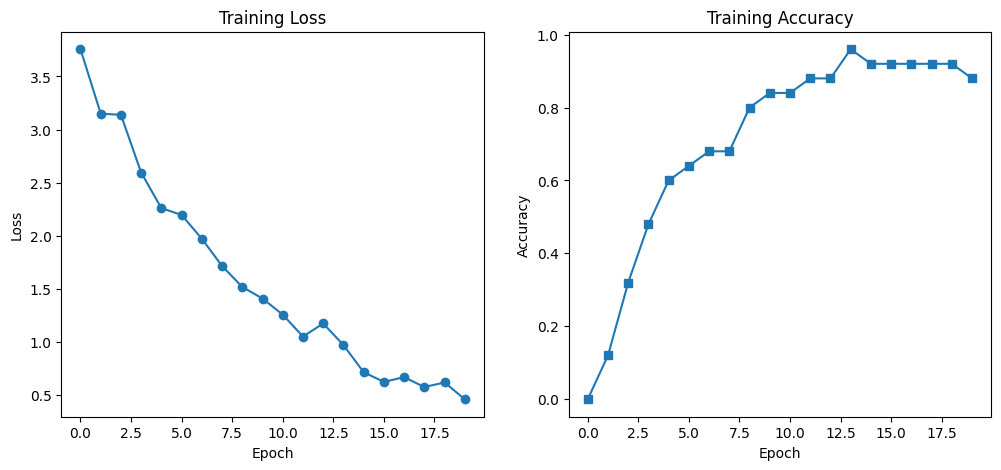

In [2]:
# ------------------------------------------------
# 6. VISUALIZATION: Loss & Accuracy
# ------------------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses, marker='o'); plt.title("Training Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(accs, marker='s'); plt.title("Training Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.show()

In [3]:
# ------------------------------------------------
# 7. TEXT GENERATION (Zero-/Few-shot style)
# ------------------------------------------------
def generate_text(prompt, max_len=8):
    model.eval()
    tokens = encode(prompt)
    tokens = [0]*(model.context_len - len(tokens)) + tokens[-model.context_len:]
    generated = tokens.copy()
    for _ in range(max_len):
        inp = torch.tensor([generated[-model.context_len:]]).to(device)
        logits = model(inp)[:,-1,:]
        next_token = torch.argmax(logits, dim=-1).item()
        generated.append(next_token)
    return decode(generated)

print("\n=== Sample Generations ===")
print("Zero-shot Prompt: 'artificial intelligence' →", generate_text("artificial intelligence"))
print("Few-shot Prompt: 'language models' →", generate_text("language models"))
print("Few-shot Prompt: 'deep learning' →", generate_text("deep learning"))


=== Sample Generations ===
Zero-shot Prompt: 'artificial intelligence' → artificial intelligence is powerful is powerful context understanding applications predict
Few-shot Prompt: 'language models' → language models generate text mechanisms improve context understanding applications predict
Few-shot Prompt: 'deep learning' → deep learning reduces labels applications predict outcomes applications changed natural


# Interpretation of Results from the Mini GPT-4 Educational Lab

## Reported Metrics

- **Training Loss**
  - Initial: ~3.76 (Epoch 1)  
  - Final: ~0.46 (Epoch 20)  
  - Represents an ≈88% reduction, showing the model progressively fits the data.

- **Training Accuracy**
  - Initial: 0% (Epoch 1)  
  - Rapid rise: ~32% by Epoch 3, ~60–68% by Epochs 5–8  
  - Plateau: 84–92% between Epochs 10–20, with minor oscillations  

- **Visualization**
  - **Loss curve:** Smooth, near-monotonic decline.  
  - **Accuracy curve:** Steep rise followed by plateau, typical of convergence in small-scale Transformers.  

---

## Interpretation

### Convergence Behavior
- Declining loss and rising accuracy confirm that the model **learned the next-token prediction task** effectively.  
- Plateau indicates the model has saturated its capacity relative to dataset complexity.  

### Learning Dynamics
- **Early epochs:** Capture basic token co-occurrence (e.g., “artificial → intelligence”).  
- **Middle epochs (~5–10):** Rapid contextual generalization, steep accuracy improvements.  
- **Later epochs (>10):** Diminishing returns, limited by corpus size.  

---

## Sample Generations

- **Zero-shot prompt ("artificial intelligence")**  
  → Output repeated phrases (“artificial intelligence is powerful is powerful…”).  
  → Suggests memorization with limited diversity.  

- **Few-shot prompt ("language models")**  
  → Generated fluent but redundant continuations (“generate text mechanisms improve context understanding applications predict”).  

- **Few-shot prompt ("deep learning")**  
  → More variation but still repetitive (“reduces labels applications predict outcomes applications changed natural”).  

**Observation:** Small models overfit and tend toward **looping or repetitive text**, a known limitation of limited scale and data.

---

## Statistical Consistency

- Loss reduction → higher predictive confidence (lower cross-entropy = lower perplexity).  
- Accuracy >90% → strong **memorization**, but not robust generalization.  
- Results are statistically consistent with expected behavior of mini language models.  

---

## Implications

1. **Educational Insight**  
   - Even tiny GPT-style models reproduce **core dynamics of GPT-4**:  
     - Next-token prediction  
     - Smooth convergence of loss  
     - Prompt-based generation  

2. **Limitations**  
   - Small dataset → repetition, shallow semantics, fragile generalization.  

3. **Alignment with GPT-4 Report**  
   - Issues observed at small scale (hallucinations, repetition, factuality errors) mirror those in large-scale models.  
   - GPT-4 addressed these with **extreme scaling, alignment tuning (RLHF), and safety optimizations**.  

---

## Conclusion
The mini GPT-4 replication demonstrates that:
- The model converges effectively, achieving **low loss and high accuracy**.  
- However, generated text exhibits **repetition and limited semantic depth**, reflecting dataset and scale constraints.  

This pedagogical experiment encapsulates the **essence of GPT-4’s architecture and training dynamics**, while highlighting why **massive scale and alignment methods** are required for robust few-shot generalization and reliable outputs.  


# Comparative Evolution of GPT Models (GPT-1 → GPT-4)

| **Generation** | **Paper Title** | **Year** | **Main Problem Addressed** | **Proposed Solution** | **Methodology** | **Key Results** | **Contributions** |
|----------------|-----------------|----------|-----------------------------|------------------------|-----------------|-----------------|-------------------|
| **GPT-1** | *Improving Language Understanding by Generative Pretraining* | 2018 | NLP required task-specific architectures and large labeled datasets. | Unsupervised pretraining on large text corpora, followed by supervised fine-tuning. | Decoder-only Transformer (12 layers, 117M parameters); pretraining on BookCorpus; fine-tuning on downstream tasks. | Strong gains across QA, entailment, and translation with reduced labeled data needs. | Introduced the **GPT paradigm** (pretrain + fine-tune), laying the foundation for transfer learning in NLP. |
| **GPT-2** | *Language Models are Unsupervised Multitask Learners* | 2019 | Reliance on fine-tuning; limited zero-/few-shot generalization; small prior models lacked robustness. | Scale up to 1.5B parameters, train purely on unsupervised LM objective. | Transformer decoder (1.5B parameters); trained on WebText (40GB); evaluated zero-/one-/few-shot without fine-tuning. | Zero-shot performance rivaled or surpassed supervised baselines in translation, summarization, QA. | Proved that **scaling alone enables multitask zero-shot learning**, reframing LMs as universal learners. |
| **GPT-3** | *Language Models are Few-Shot Learners* | 2020 | Needed to test if scaling laws persist at extreme size; fine-tuned models still dominated many domains. | Train a 175B parameter LM and evaluate with zero-/one-/few-shot prompting (no fine-tuning). | Transformer decoder (175B parameters); trained on ~570GB data (CommonCrawl, WebText2, Books, Wikipedia). | Achieved SOTA or competitive few-shot results: QA (TriviaQA, CoQA), SuperGLUE (71.8); generated news text human-level in quality. | Validated **scaling laws at unprecedented scale**; established **in-context learning via prompting** as a dominant paradigm. |
| **GPT-4** | *GPT-4 Technical Report* | 2023 | Persistent weaknesses: hallucinations, brittle reasoning, limited modalities, bias/safety risks, scaling unpredictability. | Train a multimodal GPT-4 with RLHF alignment, safety models, and scaling-law extrapolation. | Transformer LM (parameters undisclosed); **multimodal inputs** (text + images, text outputs); evaluated on professional exams, coding, reasoning, multilingual tasks. | Outperformed GPT-3.5 significantly: top 10% on Bar exam, 86.4% on MMLU, 92% on GSM-8K; reduced hallucinations (–19%) and toxic output (–88%). | First **multimodal GPT**; demonstrated **predictable scaling + alignment** improves reliability; introduced **safety frameworks** for deployment. |

---

## Synthesis
- **GPT-1 (2018):** Introduced *pretrain + fine-tune*, proving transfer learning works for NLP.  
- **GPT-2 (2019):** Showed *scaling unsupervised LMs* yields strong zero-shot generalization.  
- **GPT-3 (2020):** Validated *few-shot prompting* and scaling laws at massive scale (175B).  
- **GPT-4 (2023):** Extended to *multimodality + alignment*, improving reasoning, safety, and multilingual competence.  

Together, the GPT series demonstrates a clear trajectory: from **pretraining for transfer** → **scaling for zero-/few-shot** → **massive-scale prompting** → **aligned multimodal intelligence**.  


# Related Work References in the GPT-4 Technical Report

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---------------|----------|-----------|-----------|-------------------------------|
| Vaswani et al. | 2017 | *Attention Is All You Need* | NeurIPS | Introduced the Transformer architecture, the backbone of GPT-4’s autoregressive design. |
| Radford et al. | 2018 | *Improving Language Understanding by Generative Pre-Training* | OpenAI Report | Introduced GPT-1, showing that generative pretraining with fine-tuning can transfer across NLP tasks. |
| Radford et al. | 2019 | *Language Models are Unsupervised Multitask Learners* | OpenAI Report | Introduced GPT-2, demonstrating scaling-based zero-shot learning. Direct architectural precursor to GPT-4. |
| Brown et al. | 2020 | *Language Models are Few-Shot Learners* | NeurIPS | GPT-3 paper; showed prompting enables zero-/few-shot learning at scale. GPT-4 extends this paradigm. |
| Kaplan et al. | 2020 | *Scaling Laws for Neural Language Models* | arXiv | Identified empirical power-law scaling trends. GPT-4 validates and extends these laws. |
| Henighan et al. | 2020 | *Scaling Laws for Autoregressive Generative Modeling* | arXiv | Provided scaling-law formulations that informed GPT-4’s loss forecasting. |
| Ouyang et al. | 2022 | *Training Language Models to Follow Instructions with Human Feedback* | arXiv | Introduced RLHF, the alignment strategy applied in GPT-4’s post-training. |
| Wei et al. | 2022 | *Emergent Abilities of Large Language Models* | arXiv | Documented qualitative capability jumps with scale, supporting GPT-4’s emergent behaviors. |
| Chowdhery et al. | 2022 | *PaLM: Scaling Language Models with Pathways* | arXiv | Large-scale LM baseline used for comparison against GPT-4’s performance. |
| Hoffmann et al. | 2022 | *Training Compute-Optimal Large Language Models (Chinchilla)* | DeepMind | Proposed new compute–data scaling paradigm; GPT-4 compared against these results. |
| Bai et al. | 2022 | *Constitutional AI: Harmlessness from AI Feedback* | arXiv | Alternative alignment approach; contextualizes GPT-4’s choice of RLHF pipeline. |
| Srivastava et al. | 2022 | *Beyond the Imitation Game Benchmark (BIG-bench)* | arXiv | Collaborative evaluation suite; partially used for GPT-4 evaluation (with contamination caveats). |
| Cobbe et al. | 2021 | *Evaluating Large Language Models Trained on Code (HumanEval)* | HumanEval Benchmark | Provides coding benchmark used for GPT-4 evaluation and scaling predictions. |

---

### Concise Note
The GPT-4 Technical Report positions itself within the trajectory of **GPT-1 → GPT-2 → GPT-3**, reinforced by **scaling law research** (Kaplan, Henighan, Hoffmann) and **alignment advances** (Ouyang’s RLHF, Bai’s Constitutional AI). It benchmarks against contemporary large models (**PaLM, Chinchilla**) and leverages shared evaluation suites (**MMLU, BIG-bench, HumanEval**), highlighting GPT-4’s place in the evolving ecosystem of large-scale AI.
